# Part 1: Python Data Manipulation and Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in CSV here
life_expectancy_data = pd.read_csv("Life Expectancy Data.csv")
life_expectancy_data_2015 = life_expectancy_data[life_expectancy_data["Year"] == 2015]
print(life_expectancy_data_2015)

                                 Country  Year      Status  Life_expectancy  \
0                            Afghanistan  2015  Developing             65.0   
16                               Albania  2015  Developing             77.8   
32                               Algeria  2015  Developing             75.6   
48                                Angola  2015  Developing             52.4   
64                   Antigua and Barbuda  2015  Developing             76.4   
...                                  ...   ...         ...              ...   
2858  Venezuela (Bolivarian Republic of)  2015  Developing             74.1   
2874                            Viet Nam  2015  Developing             76.0   
2890                               Yemen  2015  Developing             65.7   
2906                              Zambia  2015  Developing             61.8   
2922                            Zimbabwe  2015  Developing             67.0   

      Adult_Mortality  infant_deaths  Alcohol  perc

Question 1.1 (5 points): Plot the boxplot for life expectancy in developing and developed countries in 2015. Label y-axis and change xticks to appropriate labels for the boxes (Developing and Developed). You should have two boxes in the plot: one for developing and one for developed.

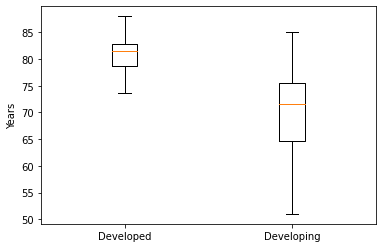

In [4]:
statuses = np.unique(life_expectancy_data_2015["Status"]) #Developed, Developing
expectancies = []

for status in statuses:
    expectancy = np.array(life_expectancy_data_2015[(life_expectancy_data_2015["Status"]) == status]["Life_expectancy"])
    expectancies.append(expectancy)

plt.boxplot(expectancies)
plt.xticks(range(1,len(statuses)+1), statuses)
plt.ylabel("Years")
plt.show()

Question 1.2 (5 points): Create a scatter plot between life expectancy and GDP in 2015.
Label axes appropriately.

Question 1.3 (10 points): Create a stacked histogram for BMI in 2015, where the stacked
bars are on status (developed and developing). Don’t forget to include a legend.

Question 1.4 (10 points): Create a solid line plot showing the average (across all nations)
life expectancy changing over time, with the standard deviation above and below shown with
filled between plot (use fill between plotting function with alpha = 0.3). Additionally, plot
the maximum life expectancy for each year and the minimum life expectancy for each year
as dotted line plots over time. Include legend for mean, minimum, and maximum, and don’t
forget axes labels.

Question 1.5 (15 points): Extract Hepatitis B, Polio, Measles, BMI, Diphtheria, HIV/AIDS
for 2015 and remove the rows with NaN elements (use dropna()). Create the correlation
coefficient matrix (use np.corrcoef()) and create a heatmap showing the correlations, using
pcolor() and matplotlib. Label the rows and columns with the appropriate diseases. Include
a colorbar and a label on the colorbar. Which of these two are the most heavily correlated?